In [1]:
import numpy as np
import pandas as pd

In [2]:
loan_data = pd.read_csv('data/cleaned_data.csv')
loan_data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,127.0,360.0,1,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
593,0,0,0,0,0,2900.0,0.0,71.0,360.0,1,0,1
594,1,1,3,0,0,4106.0,0.0,40.0,180.0,1,0,1
595,1,1,1,0,0,8072.0,240.0,253.0,360.0,1,2,1
596,1,1,2,0,0,7583.0,0.0,187.0,360.0,1,2,1


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

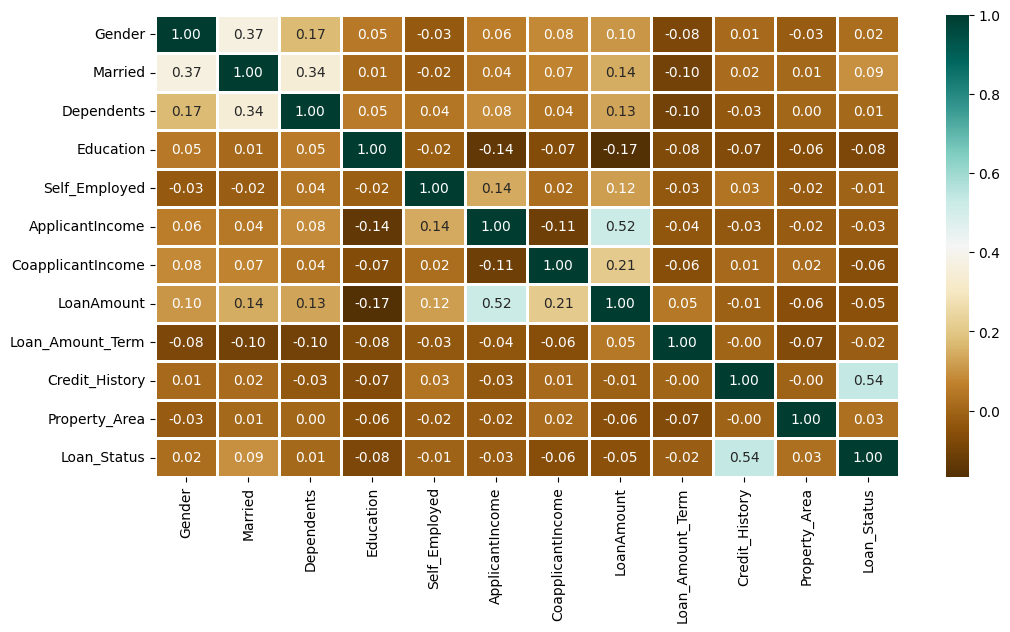

In [4]:
plt.figure(figsize=(12,6))

sns.heatmap(loan_data.corr(),cmap='BrBG',fmt='.2f',
			linewidths=2,annot=True)


In [75]:
from sklearn.model_selection import train_test_split

In [89]:
X = loan_data.drop(['Loan_Status'],axis=1)
Y = loan_data['Loan_Status']
X.shape,Y.shape

((598, 11), (598,))

In [91]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
													test_size=0.3,
													random_state=1)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((418, 11), (180, 11), (418,), (180,))

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [93]:
model = RandomForestClassifier()
model.fit(X_train, Y_train)

RandomForestClassifier()

In [107]:
features = X_train.columns
importance = model.feature_importances_

pd.DataFrame({"Features": features,
			  "Importance": importance})

,Features,Importance
0,Gender,0.019755
1,Married,0.028737
2,Dependents,0.043823
3,Education,0.028707
4,Self_Employed,0.022327
5,ApplicantIncome,0.217596
6,CoapplicantIncome,0.114459
7,LoanAmount,0.191728
8,Loan_Amount_Term,0.052782
9,Credit_History,0.224988


In [108]:
X = X[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']]

In [109]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [120]:
def train_random_forest(num_estimators, maximum_depth):
	rf = RandomForestClassifier(n_estimators=num_estimators, max_depth=maximum_depth, n_jobs=-1)
	rf_model = rf.fit(X_train, Y_train)
	y_pred = rf_model.predict(X_test)

	precision = "%.3f" % metrics.precision_score(Y_test, y_pred)
	accuracy = "%.3f" % metrics.accuracy_score(Y_test, y_pred)
	recall = "%.3f" % metrics.recall_score(Y_test, y_pred)

	print(f'Estimators: {num_estimators} / Depth: {maximum_depth} --- '
		  f'Precision {precision} / Accuracy: {accuracy} / Recall: {recall}')


In [121]:
num_est = [1, 5, 10, 20, 50, 100]
depths = [5, 10, 20, 30, None]

for n_est in num_est:
	for depth in depths:
		train_random_forest(n_est, depth)


Estimators: 1 / Depth: 5 --- Precision 0.803 / Accuracy: 0.811 / Recall: 0.968
Estimators: 1 / Depth: 10 --- Precision 0.808 / Accuracy: 0.728 / Recall: 0.802
Estimators: 1 / Depth: 20 --- Precision 0.782 / Accuracy: 0.717 / Recall: 0.825
Estimators: 1 / Depth: 30 --- Precision 0.761 / Accuracy: 0.639 / Recall: 0.706
Estimators: 1 / Depth: None --- Precision 0.766 / Accuracy: 0.678 / Recall: 0.778
Estimators: 5 / Depth: 5 --- Precision 0.811 / Accuracy: 0.811 / Recall: 0.952
Estimators: 5 / Depth: 10 --- Precision 0.784 / Accuracy: 0.739 / Recall: 0.865
Estimators: 5 / Depth: 20 --- Precision 0.815 / Accuracy: 0.756 / Recall: 0.841
Estimators: 5 / Depth: 30 --- Precision 0.825 / Accuracy: 0.794 / Recall: 0.897
Estimators: 5 / Depth: None --- Precision 0.809 / Accuracy: 0.767 / Recall: 0.873
Estimators: 10 / Depth: 5 --- Precision 0.812 / Accuracy: 0.817 / Recall: 0.960
Estimators: 10 / Depth: 10 --- Precision 0.816 / Accuracy: 0.794 / Recall: 0.913
Estimators: 10 / Depth: 20 --- Precis

In [131]:
def train_knn(num_neighbor, weight_function):
	knn = KNeighborsClassifier(n_neighbors=num_neighbor, weights=weight_function)
	knn_model = knn.fit(X_train, Y_train)
	y_pred = knn_model.predict(X_test)

	precision = "%.3f" % metrics.precision_score(Y_test, y_pred)
	accuracy = "%.3f" % metrics.accuracy_score(Y_test, y_pred)
	recall = "%.3f" % metrics.recall_score(Y_test, y_pred)

	print(f'Neighbors: {num_neighbor} / Weight: {weight_function} --- '
		  f'Precision {precision} / Accuracy: {accuracy} / Recall: {recall}')


In [132]:
num_neighbors = [2, 3, 4, 5, 6, 7]
weights = ['uniform', 'distance']

for neighbor in num_neighbors:
	for weight in weights:
		train_knn(neighbor, weight)

Neighbors: 2 / Weight: uniform --- Precision 0.686 / Accuracy: 0.511 / Recall: 0.556
Neighbors: 2 / Weight: distance --- Precision 0.699 / Accuracy: 0.594 / Recall: 0.738
Neighbors: 3 / Weight: uniform --- Precision 0.673 / Accuracy: 0.583 / Recall: 0.786
Neighbors: 3 / Weight: distance --- Precision 0.692 / Accuracy: 0.606 / Recall: 0.786
Neighbors: 4 / Weight: uniform --- Precision 0.680 / Accuracy: 0.544 / Recall: 0.659
Neighbors: 4 / Weight: distance --- Precision 0.682 / Accuracy: 0.600 / Recall: 0.802
Neighbors: 5 / Weight: uniform --- Precision 0.693 / Accuracy: 0.628 / Recall: 0.841
Neighbors: 5 / Weight: distance --- Precision 0.675 / Accuracy: 0.594 / Recall: 0.810
Neighbors: 6 / Weight: uniform --- Precision 0.689 / Accuracy: 0.578 / Recall: 0.722
Neighbors: 6 / Weight: distance --- Precision 0.680 / Accuracy: 0.600 / Recall: 0.810
Neighbors: 7 / Weight: uniform --- Precision 0.713 / Accuracy: 0.689 / Recall: 0.929
Neighbors: 7 / Weight: distance --- Precision 0.692 / Accura

In [133]:
def train_svm(c_value, degree_value):
	swm = SVC(C=value, degree=degree_value)
	svm_model = swm.fit(X_train, Y_train)
	y_pred = svm_model.predict(X_test)

	precision = "%.3f" % metrics.precision_score(Y_test, y_pred)
	accuracy = "%.3f" % metrics.accuracy_score(Y_test, y_pred)
	recall = "%.3f" % metrics.recall_score(Y_test, y_pred)

	print(f'C: {c_value} / Degree: {degree_value} --- '
		  f'Precision {precision} / Accuracy: {accuracy} / Recall: {recall}')


In [136]:
C = [0.0001, 0.001, 0.01, 0.1, 1, 10]
degrees = [1, 2, 3, 4, 5]

for value in C:
	for degree in degrees:
		train_svm(value, degree)

C: 0.0001 / Degree: 1 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.0001 / Degree: 2 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.0001 / Degree: 3 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.0001 / Degree: 4 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.0001 / Degree: 5 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.001 / Degree: 1 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.001 / Degree: 2 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.001 / Degree: 3 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.001 / Degree: 4 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.001 / Degree: 5 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.01 / Degree: 1 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.01 / Degree: 2 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.01 / Degree: 3 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
C: 0.01 / Degree: 4 ---

In [143]:
def train_lr(penalty_value, c_value):
	lr = LogisticRegression(penalty=penalty_value, C=c_value)
	lr_model = lr.fit(X_train, Y_train)
	y_pred = lr_model.predict(X_test)

	precision = "%.3f" % metrics.precision_score(Y_test, y_pred)
	accuracy = "%.3f" % metrics.accuracy_score(Y_test, y_pred)
	recall = "%.3f" % metrics.recall_score(Y_test, y_pred)

	print(f'Penalty: {penalty_value} / C: {c_value} --- '
		  f'Precision {precision} / Accuracy: {accuracy} / Recall: {recall}')


In [145]:
penalties = [None, 'l2']
C = [0.0001, 0.001, 0.01, 0.1, 1, 10]

for value in C:
	for penalty in penalties:
		train_lr(penalty, value)

Penalty: None / C: 0.0001 --- Precision 0.811 / Accuracy: 0.811 / Recall: 0.952
Penalty: l2 / C: 0.0001 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
Penalty: None / C: 0.001 --- Precision 0.811 / Accuracy: 0.811 / Recall: 0.952
Penalty: l2 / C: 0.001 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
Penalty: None / C: 0.01 --- Precision 0.811 / Accuracy: 0.811 / Recall: 0.952
Penalty: l2 / C: 0.01 --- Precision 0.700 / Accuracy: 0.700 / Recall: 1.000
Penalty: None / C: 0.1 --- Precision 0.811 / Accuracy: 0.811 / Recall: 0.952
Penalty: l2 / C: 0.1 --- Precision 0.812 / Accuracy: 0.833 / Recall: 0.992
Penalty: None / C: 1 --- Precision 0.811 / Accuracy: 0.811 / Recall: 0.952
Penalty: l2 / C: 1 --- Precision 0.812 / Accuracy: 0.817 / Recall: 0.960
Penalty: None / C: 10 --- Precision 0.811 / Accuracy: 0.811 / Recall: 0.952
Penalty: l2 / C: 10 --- Precision 0.812 / Accuracy: 0.817 / Recall: 0.960


C:\Users\rueip\PycharmProjects\loan-approval-prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rueip\PycharmProjects\loan-approval-prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\rueip\PycharmProjects\loan-approval-prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\rueip\PycharmProj